In [4]:
import requests
import json
import urllib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import re
import numpy as np
from PIL import Image
import io
import torchvision.transforms as transforms
import torch
import random
import os
import shutil
from skimage.metrics import structural_similarity as ssim
from scipy.ndimage import correlate
import cv2

In [4]:
from PIL import Image
import os

def calculate_average_image_properties(directory):
    total_width = 0
    total_height = 0
    total_ratio = 0
    total_images = 0

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith('.jpg'):
                file_path = os.path.join(root, filename)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                        total_ratio += width / height
                        total_images += 1
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    if total_images > 0:
        average_width = total_width / total_images
        average_height = total_height / total_images
        average_ratio = total_ratio / total_images
        return average_width, average_height, average_ratio
    else:
        return None

# Replace 'your_directory_path' with the path to your top-level directory
directory_path = 'bw'
result = calculate_average_image_properties(directory_path)

if result:
    average_width, average_height, average_ratio = result
    print(f"Average Width: {average_width}")
    print(f"Average Height: {average_height}")
    print(f"Average Ratio: {average_ratio}")
else:
    print("No .jpg files found in the specified directory or its subdirectories.")

Average Width: 891.7685320572467
Average Height: 1276.4102086933403
Average Ratio: 0.6984761310206455


In [5]:
directory_path = 'color'
result = calculate_average_image_properties(directory_path)

if result:
    average_width, average_height, average_ratio = result
    print(f"Average Width: {average_width}")
    print(f"Average Height: {average_height}")
    print(f"Average Ratio: {average_ratio}")
else:
    print("No .jpg files found in the specified directory or its subdirectories.")

Average Width: 992.6287427609151
Average Height: 1420.356512095946
Average Ratio: 0.7050613177334206


In [5]:
ratio = (280, 400)

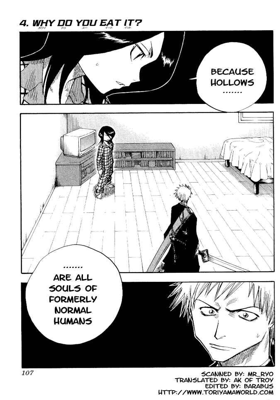

In [6]:
title = 'bleach'
chapter = '4'

bw_path = '/'.join(['bw', title, chapter, '1.jpg'])
bw_pic = Image.open(bw_path)

bw_pic.resize(ratio)

In [33]:
def resize_and_save(input_path, output_root, new_size):
    try:
        with Image.open(input_path) as img:
            
            output_dir = output_root +  "_resized" + os.path.dirname(input_path).replace(output_root, '')
            os.makedirs(output_dir, exist_ok=True)
            output_path = os.path.join(output_dir, os.path.basename(input_path))
            
            if not os.path.exists(output_path):
                if output_root == 'bw' and img.mode != 'L':
                    resized_img = img.resize(new_size).convert('L')
                else:
                    resized_img = img.resize(new_size)
            
                resized_img.save(output_path)
                print(f"Resized and saved: {output_path}")
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def resize_images_in_directory(root_directory, new_size):
    for root, dirs, files in os.walk(root_directory):
        for filename in files:
            if filename.lower().endswith('.jpg'):
                file_path = os.path.join(root, filename)
                resize_and_save(file_path, root_directory, new_size)

# Example usage:
root_directory = 'color'
new_size = (280, 400)

resize_images_in_directory(root_directory, new_size)

Resized and saved: color_resized\bleach\24\0.jpg
Resized and saved: color_resized\bleach\24\1.jpg
Resized and saved: color_resized\bleach\24\10.jpg
Resized and saved: color_resized\bleach\24\11.jpg
Resized and saved: color_resized\bleach\24\12.jpg
Resized and saved: color_resized\bleach\24\13.jpg
Resized and saved: color_resized\bleach\24\14.jpg
Resized and saved: color_resized\bleach\24\15.jpg
Resized and saved: color_resized\bleach\24\16.jpg
Resized and saved: color_resized\bleach\24\17.jpg
Resized and saved: color_resized\bleach\24\18.jpg
Resized and saved: color_resized\bleach\24\19.jpg
Resized and saved: color_resized\bleach\24\2.jpg
Resized and saved: color_resized\bleach\24\3.jpg
Resized and saved: color_resized\bleach\24\4.jpg
Resized and saved: color_resized\bleach\24\5.jpg
Resized and saved: color_resized\bleach\24\6.jpg
Resized and saved: color_resized\bleach\24\7.jpg
Resized and saved: color_resized\bleach\24\8.jpg
Resized and saved: color_resized\bleach\24\9.jpg
Resized an

Resized and saved: color_resized\bleach\500\11.jpg
Resized and saved: color_resized\bleach\500\12.jpg
Resized and saved: color_resized\bleach\500\13.jpg
Resized and saved: color_resized\bleach\500\14.jpg
Resized and saved: color_resized\bleach\500\15.jpg
Resized and saved: color_resized\bleach\500\16.jpg
Resized and saved: color_resized\bleach\500\17.jpg
Resized and saved: color_resized\bleach\500\18.jpg
Resized and saved: color_resized\bleach\500\19.jpg
Resized and saved: color_resized\bleach\500\2.jpg
Resized and saved: color_resized\bleach\500\3.jpg
Resized and saved: color_resized\bleach\500\4.jpg
Resized and saved: color_resized\bleach\500\5.jpg
Resized and saved: color_resized\bleach\500\6.jpg
Resized and saved: color_resized\bleach\500\7.jpg
Resized and saved: color_resized\bleach\500\8.jpg
Resized and saved: color_resized\bleach\500\9.jpg
Resized and saved: color_resized\bleach\507\0.jpg
Resized and saved: color_resized\bleach\507\1.jpg
Resized and saved: color_resized\bleach\5

Resized and saved: color_resized\bleach\564\6.jpg
Resized and saved: color_resized\bleach\564\7.jpg
Resized and saved: color_resized\bleach\564\8.jpg
Resized and saved: color_resized\bleach\564\9.jpg
Resized and saved: color_resized\bleach\567\0.jpg
Resized and saved: color_resized\bleach\567\1.jpg
Resized and saved: color_resized\bleach\567\10.jpg
Resized and saved: color_resized\bleach\567\11.jpg
Resized and saved: color_resized\bleach\567\12.jpg
Resized and saved: color_resized\bleach\567\13.jpg
Resized and saved: color_resized\bleach\567\14.jpg
Resized and saved: color_resized\bleach\567\15.jpg
Resized and saved: color_resized\bleach\567\16.jpg
Resized and saved: color_resized\bleach\567\17.jpg
Resized and saved: color_resized\bleach\567\18.jpg
Resized and saved: color_resized\bleach\567\2.jpg
Resized and saved: color_resized\bleach\567\3.jpg
Resized and saved: color_resized\bleach\567\4.jpg
Resized and saved: color_resized\bleach\567\5.jpg
Resized and saved: color_resized\bleach\5

Resized and saved: color_resized\bleach\636\9.jpg
Resized and saved: color_resized\bleach\652\0.jpg
Resized and saved: color_resized\bleach\652\1.jpg
Resized and saved: color_resized\bleach\652\10.jpg
Resized and saved: color_resized\bleach\652\11.jpg
Resized and saved: color_resized\bleach\652\12.jpg
Resized and saved: color_resized\bleach\652\13.jpg
Resized and saved: color_resized\bleach\652\14.jpg
Resized and saved: color_resized\bleach\652\15.jpg
Resized and saved: color_resized\bleach\652\16.jpg
Resized and saved: color_resized\bleach\652\17.jpg
Resized and saved: color_resized\bleach\652\18.jpg
Resized and saved: color_resized\bleach\652\19.jpg
Resized and saved: color_resized\bleach\652\2.jpg
Resized and saved: color_resized\bleach\652\20.jpg
Resized and saved: color_resized\bleach\652\21.jpg
Resized and saved: color_resized\bleach\652\22.jpg
Resized and saved: color_resized\bleach\652\23.jpg
Resized and saved: color_resized\bleach\652\24.jpg
Resized and saved: color_resized\bl

Resized and saved: color_resized\chainsaw man\2\24.jpg
Resized and saved: color_resized\chainsaw man\2\3.jpg
Resized and saved: color_resized\chainsaw man\2\4.jpg
Resized and saved: color_resized\chainsaw man\2\5.jpg
Resized and saved: color_resized\chainsaw man\2\6.jpg
Resized and saved: color_resized\chainsaw man\2\7.jpg
Resized and saved: color_resized\chainsaw man\2\8.jpg
Resized and saved: color_resized\chainsaw man\2\9.jpg
Resized and saved: color_resized\chainsaw man\5\0.jpg
Resized and saved: color_resized\chainsaw man\5\1.jpg
Resized and saved: color_resized\chainsaw man\5\10.jpg
Resized and saved: color_resized\chainsaw man\5\11.jpg
Resized and saved: color_resized\chainsaw man\5\12.jpg
Resized and saved: color_resized\chainsaw man\5\13.jpg
Resized and saved: color_resized\chainsaw man\5\14.jpg
Resized and saved: color_resized\chainsaw man\5\15.jpg
Resized and saved: color_resized\chainsaw man\5\16.jpg
Resized and saved: color_resized\chainsaw man\5\17.jpg
Resized and saved: 

Resized and saved: color_resized\dragon ball super\4\11.jpg
Resized and saved: color_resized\dragon ball super\4\12.jpg
Resized and saved: color_resized\dragon ball super\4\13.jpg
Resized and saved: color_resized\dragon ball super\4\14.jpg
Resized and saved: color_resized\dragon ball super\4\15.jpg
Resized and saved: color_resized\dragon ball super\4\16.jpg
Resized and saved: color_resized\dragon ball super\4\17.jpg
Resized and saved: color_resized\dragon ball super\4\18.jpg
Resized and saved: color_resized\dragon ball super\4\2.jpg
Resized and saved: color_resized\dragon ball super\4\3.jpg
Resized and saved: color_resized\dragon ball super\4\4.jpg
Resized and saved: color_resized\dragon ball super\4\5.jpg
Resized and saved: color_resized\dragon ball super\4\6.jpg
Resized and saved: color_resized\dragon ball super\4\7.jpg
Resized and saved: color_resized\dragon ball super\4\8.jpg
Resized and saved: color_resized\dragon ball super\4\9.jpg
Resized and saved: color_resized\dragon ball sup

Resized and saved: color_resized\gantz\1\37.jpg
Resized and saved: color_resized\gantz\1\38.jpg
Resized and saved: color_resized\gantz\1\39.jpg
Resized and saved: color_resized\gantz\1\4.jpg
Resized and saved: color_resized\gantz\1\40.jpg
Resized and saved: color_resized\gantz\1\5.jpg
Resized and saved: color_resized\gantz\1\6.jpg
Resized and saved: color_resized\gantz\1\7.jpg
Resized and saved: color_resized\gantz\1\8.jpg
Resized and saved: color_resized\gantz\1\9.jpg
Resized and saved: color_resized\gantz\2\0.jpg
Resized and saved: color_resized\gantz\2\1.jpg
Resized and saved: color_resized\gantz\2\10.jpg
Resized and saved: color_resized\gantz\2\11.jpg
Resized and saved: color_resized\gantz\2\12.jpg
Resized and saved: color_resized\gantz\2\13.jpg
Resized and saved: color_resized\gantz\2\14.jpg
Resized and saved: color_resized\gantz\2\15.jpg
Resized and saved: color_resized\gantz\2\16.jpg
Resized and saved: color_resized\gantz\2\17.jpg
Resized and saved: color_resized\gantz\2\18.jpg


Resized and saved: color_resized\golden kamuy\14\8.jpg
Resized and saved: color_resized\golden kamuy\14\9.jpg
Resized and saved: color_resized\golden kamuy\15\0.jpg
Resized and saved: color_resized\golden kamuy\15\1.jpg
Resized and saved: color_resized\golden kamuy\15\10.jpg
Resized and saved: color_resized\golden kamuy\15\11.jpg
Resized and saved: color_resized\golden kamuy\15\12.jpg
Resized and saved: color_resized\golden kamuy\15\13.jpg
Resized and saved: color_resized\golden kamuy\15\14.jpg
Resized and saved: color_resized\golden kamuy\15\15.jpg
Resized and saved: color_resized\golden kamuy\15\16.jpg
Resized and saved: color_resized\golden kamuy\15\2.jpg
Resized and saved: color_resized\golden kamuy\15\3.jpg
Resized and saved: color_resized\golden kamuy\15\4.jpg
Resized and saved: color_resized\golden kamuy\15\5.jpg
Resized and saved: color_resized\golden kamuy\15\6.jpg
Resized and saved: color_resized\golden kamuy\15\7.jpg
Resized and saved: color_resized\golden kamuy\15\8.jpg
Res

Resized and saved: color_resized\golden kamuy\27\14.jpg
Resized and saved: color_resized\golden kamuy\27\15.jpg
Resized and saved: color_resized\golden kamuy\27\16.jpg
Resized and saved: color_resized\golden kamuy\27\17.jpg
Resized and saved: color_resized\golden kamuy\27\18.jpg
Resized and saved: color_resized\golden kamuy\27\19.jpg
Resized and saved: color_resized\golden kamuy\27\2.jpg
Resized and saved: color_resized\golden kamuy\27\20.jpg
Resized and saved: color_resized\golden kamuy\27\21.jpg
Resized and saved: color_resized\golden kamuy\27\22.jpg
Resized and saved: color_resized\golden kamuy\27\23.jpg
Resized and saved: color_resized\golden kamuy\27\24.jpg
Resized and saved: color_resized\golden kamuy\27\3.jpg
Resized and saved: color_resized\golden kamuy\27\4.jpg
Resized and saved: color_resized\golden kamuy\27\5.jpg
Resized and saved: color_resized\golden kamuy\27\6.jpg
Resized and saved: color_resized\golden kamuy\27\7.jpg
Resized and saved: color_resized\golden kamuy\27\8.jpg

Resized and saved: color_resized\golden kamuy\40\19.jpg
Resized and saved: color_resized\golden kamuy\40\2.jpg
Resized and saved: color_resized\golden kamuy\40\3.jpg
Resized and saved: color_resized\golden kamuy\40\4.jpg
Resized and saved: color_resized\golden kamuy\40\5.jpg
Resized and saved: color_resized\golden kamuy\40\6.jpg
Resized and saved: color_resized\golden kamuy\40\7.jpg
Resized and saved: color_resized\golden kamuy\40\8.jpg
Resized and saved: color_resized\golden kamuy\40\9.jpg
Resized and saved: color_resized\golden kamuy\41\0.jpg
Resized and saved: color_resized\golden kamuy\41\1.jpg
Resized and saved: color_resized\golden kamuy\41\10.jpg
Resized and saved: color_resized\golden kamuy\41\11.jpg
Resized and saved: color_resized\golden kamuy\41\12.jpg
Resized and saved: color_resized\golden kamuy\41\13.jpg
Resized and saved: color_resized\golden kamuy\41\14.jpg
Resized and saved: color_resized\golden kamuy\41\15.jpg
Resized and saved: color_resized\golden kamuy\41\16.jpg
Re

Resized and saved: color_resized\hunter x hunter\10\9.jpg
Resized and saved: color_resized\hunter x hunter\4\0.jpg
Resized and saved: color_resized\hunter x hunter\4\1.jpg
Resized and saved: color_resized\hunter x hunter\4\10.jpg
Resized and saved: color_resized\hunter x hunter\4\11.jpg
Resized and saved: color_resized\hunter x hunter\4\12.jpg
Resized and saved: color_resized\hunter x hunter\4\13.jpg
Resized and saved: color_resized\hunter x hunter\4\14.jpg
Resized and saved: color_resized\hunter x hunter\4\15.jpg
Resized and saved: color_resized\hunter x hunter\4\16.jpg
Resized and saved: color_resized\hunter x hunter\4\17.jpg
Resized and saved: color_resized\hunter x hunter\4\18.jpg
Resized and saved: color_resized\hunter x hunter\4\19.jpg
Resized and saved: color_resized\hunter x hunter\4\2.jpg
Resized and saved: color_resized\hunter x hunter\4\20.jpg
Resized and saved: color_resized\hunter x hunter\4\21.jpg
Resized and saved: color_resized\hunter x hunter\4\3.jpg
Resized and saved:

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\11\7.jpg
Resiz

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\15\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\16\17.jpg
Re

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\2\5.jpg
Resized and sa

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\23\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\24\17.jpg
Re

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\28\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\29\0.jpg
Resized 

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\32\3.jpg
R

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\36\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\36\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\36\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\36\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\37\14.jpg
Resiz

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\40\8.jpg
Resize

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\5\2.jpg
Resized and

Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 1 - phantom blood\9\22.jpg
Resized and

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\12\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\13\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\18\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battl

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\22\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\23\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\23\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tenden

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\27\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tend

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\31\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle ten

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\36\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle te

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\40\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle te

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\45\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle 

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\5\8

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\54\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\59\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle ten

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\63\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle t

Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\68\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\69\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\69\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tendency\69\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 2 - battle tende

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\1\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\10\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\10\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure 

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\103\18.jpg
Resized and saved: color_resize

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\107\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\108\0.jpg
Resized and saved: color_resized\jojo's

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\111\6.jpg
Resized and saved: color_resized\jo

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\115\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\115\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\115\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\115\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\116\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\116\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\116\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\116\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\116\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\116\13.jpg
Resized and saved: color_resized\joj

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\12\4.jpg
Resized and saved: color_resized\jojo's biz

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\123\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\124\0.jpg
Resized and saved: color_resized\jojo's

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\127\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\127\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\127\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\127\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\128\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\128\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\128\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\128\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\128\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\128\13.jpg
Resized and saved: color_resized\joj

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\131\6.jpg
Resized and saved: color_resized\jo

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\135\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\135\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\135\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\135\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\136\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\136\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\136\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\136\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\136\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\136\13.jpg
Resized and saved: color_resized\joj

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\14\8.jpg
Resized and saved: color_resized\jojo's bizarre

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\144\8.jpg
Resized and saved: color_resized\jojo

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\149\17.jpg
Resized and saved: color_resized

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\152\8.jpg
Resized and saved: color_resized\jojo

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\2\4.jpg
Resized and saved: color_resized\jojo's bizarre adven

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\24\5.jpg
Resized and saved: color_resized\jojo's biza

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\28\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\28\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\29\15.jpg
Resized and saved: color_resized\jojo's biza

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\32\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\33\0.jpg
Resized and saved: color_resized\jojo's bizarre a

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\37\8.jpg
Resized and saved: color_resized\jojo's bizarre

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\41\5.jpg
Resized and saved: color_resized\jojo's biza

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\45\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\45\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\45\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\45\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\45\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\46\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\46\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\46\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\46\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\46\12.jpg
Resized and saved: color_resized\jojo's bizarre

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\5\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\54\3.jpg
Resized and saved: color_resized\jojo's bi

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\58\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\59\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\59\1.jpg
Resized and saved: color_resized\jojo's bizarre ad

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\62\7.jpg
Resized and saved: color_resized\jojo's bizarr

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\67\17.jpg
Resized and saved: color_resized\jojo's bi

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\71\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\72\16.jpg
Resized and saved: color_resized\jojo's biz

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\76\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\76\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\76\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\76\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\77\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\77\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\77\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\77\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\77\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\77\13.jpg
Resized and saved: color_resized\jojo's bizarr

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\80\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\81\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\81\1.jpg
Resized and saved: color_resized\jojo's bizarre ad

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\85\8.jpg
Resized and saved: color_resized\jojo's bizarre

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\9\2.jpg
Resized and saved: color_resized\jojo's bizarre adv

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\93\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\93\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\93\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\93\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\94\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\94\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\94\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\94\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\94\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\94\13.jpg
Resized and saved: color_resized\jojo's bizarr

Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 3 - stardust crusaders\98\6.jpg
Resized and saved: color_resized\jojo's bizar

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\100\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\101\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\101\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\101\10.jpg

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\105\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\106\

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\11\19.jpg


Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\113\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\114\0.jpg

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\117\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\118\

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\121\6

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\125\

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\13\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\130\0.jpg
Resized 

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\133\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\133\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\134\1

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\138\

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\141\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\141\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\141\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\141\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\141\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\142\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\142\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\142\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\142\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\142\12.j

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\145\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\145\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\146\1

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\15\18.jpg
R

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\153\8.j

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\157\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\158\

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\161\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\162\0.jpg

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\166

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\17\3.jpg
Re

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\173\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\173\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\173\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\18\14.jpg
Re

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\22\4.jpg
Res

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\26\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\26\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\26\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\26\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\26\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\27\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\27\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\27\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\27\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\27\12.jpg
Resized

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\3\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\3\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\3\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\3\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\31\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\31\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\31\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\31\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\31\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\31\13.jpg
Resized an

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\35\7.jpg
Resize

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\39\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\39\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\39\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\39\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\4\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\4\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\4\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\4\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\4\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\4\13.jpg
Resized and 

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\44\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\45\16.jpg
Res

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\5\6.jpg
Resized and sav

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\53\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\53\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\53\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\54\14.jpg
Resiz

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\58\2.jpg
R

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\61\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\62\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\62\1.jpg
Resized an

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\65\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\66\16.jpg
Res

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\7\8.jpg
Resized and saved

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\73\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\73\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\73\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\73\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\73\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\73\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\74\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\74\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\74\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\74\11.jpg
Resized 

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\78\18.jpg
R

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\82\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\83\0.jpg
Resized a

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\87\3.jpg
Re

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\91\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\91\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\91\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\91\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\91\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\93\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\93\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\93\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\93\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\93\12.jpg
Resized

Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\96\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 4 - diamond is unbreakable\97\16.jpg
Res

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\100\9.jpg
Resized and saved:

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\106\5.jpg
Resized and sa

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\114\2.jpg
Resized and

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\130\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\130\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\130\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\130\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\132\14.jpg
Resized and save

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\136\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\137\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\137\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\137\10.jpg
Resized and saved: c

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\146\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\146\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\146\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\146\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\147\14.jpg
Resized and save

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\155\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\155\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\155\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\155\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\155\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\17\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\17\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\17\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\17\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\17\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\17\13.jpg
Resized and saved: colo

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\23\4.jpg
Resized and saved: color

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\28\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\28\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\30\16.jpg
Resized and saved: color_

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\4\9.jpg
Resized and saved: color_resized\jojo's 

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\48\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\48\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\48\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\5\15.jpg
Resized and saved: color_resized\j

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\6\9.jpg
Resized and saved: color_resized\jojo's 

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\7\19.jpg
Resized and saved: color_resized\

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\77\4.jpg
Resized and saved: color

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\83\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\83\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\83\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\83\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\83\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\85\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\85\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\85\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\85\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\85\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\85\13.jpg
Resized and saved: color_res

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\89\9.jpg
Resized and saved: color_resi

Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 5 - vento aureo\98\8.jpg
Resized and saved: color_res

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\108\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\109\0.jpg
Resized and saved: 

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\114\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\115\3.jpg
Resized and sav

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\124\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\126\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\126\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\126\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\126\11.jpg
Resized and saved: 

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\134\9.jpg
Resized and saved:

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\145\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\146\17.jpg
Resized and s

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\156\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\156\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\156\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\156\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\156\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\158\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\158\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\158\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\158\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\158\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\158\13.jpg
Resized and saved

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\25\3.jpg
Resized and saved: colo

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\31\18.jpg
Resized and saved: colo

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\4\5.jpg
Resized and saved: color_resized\joj

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\47\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\5\0.jpg
Resized and saved: color_resize

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\61\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\63\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\63\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\63\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\63\11.jpg
Resized and saved: color_resiz

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\68\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\68\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\68\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\68\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\68\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\71\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\71\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\71\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\71\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\71\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\71\13.jpg
Resized and saved: color_res

Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\78\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\78\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\78\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\78\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 6 - stone ocean\91\14.jpg
Resized and saved: color_re

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\10\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\10\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\10\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\10\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\10\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\10\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\11\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\11\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\11\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\11\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\11\12.

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\13\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\17\9

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\20\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\21\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\21\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\21\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\21\11.

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\23\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\2

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\28\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball ru

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\40.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\41.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\42.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\30\45.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\33\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball ru

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\34\53.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\34\54.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\34\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\34\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\34\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\34\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\38\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\38\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\38\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\38\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\38\1

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\40\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\43\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\45\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\45.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\46.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\47.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\48.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\49.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\50.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\46\51.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\40.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\41.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\42.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\45.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\48\46.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\5\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\5\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\5\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\5\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\5\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\5\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\50\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\50\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\50\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\50\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\50\12.jpg
Re

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\40.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\41.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\42.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\45.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\51\46.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\57\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\62\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\68\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\70\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\70\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\70\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\70\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\71\1

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\73\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\76\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\77\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\77\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\77\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\77\11.j

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8\24.jpg


Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\81\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\82\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\8

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\85\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\87\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\89\0

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\92\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\

Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run\95\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 7 - steel ball run

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\10\37.jpg
Resized and saved: color_resized\jojo's bizarre adventu

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\45.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\12\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\13\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\13\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\13\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure par

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\15\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure par

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\19\5.jpg
Resized and saved: color_resized\jojo's bizarre adventur

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\20\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\20\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\20\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\21\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure p

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\3.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\23\30.jpg
Resized and saved: color_resized\jojo's bizarre adventu

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\40.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\41.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\42.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\25\43.jpg
Resized and saved: color_resized\jojo's bizarre adventu

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\45.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\46.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\47.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\48.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\27\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure p

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\30.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\3\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\30\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojo

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\32\18.jpg
Resized and saved: color_resized\jojo's bizarre adventur

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\34\2.jpg
Resized and saved: color_resized\jojo's bizarre adventu

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\31.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\32.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\33.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\36\40.jpg
Resized and saved: color_resized\jojo's bizarre adventu

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\42.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\43.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\44.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\38\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\39\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\39\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\39\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure par

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\25.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\26.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\27.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\28.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\29.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\40\3.jpg
Resized and saved: color_resized\jojo's bizarre adventu

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\34.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\35.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\36.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\37.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\38.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\42\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure p

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\39.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\4.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\40.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\41.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\42.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\5.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\6.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\44\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\5\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\6\7.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\6\8.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\6\9.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\0.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\1.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\10.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\11.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\12.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\13.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\14.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\7\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - joj

Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\15.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\16.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\17.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\18.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\19.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\2.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\20.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\21.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\22.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\23.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 - jojolion\9\24.jpg
Resized and saved: color_resized\jojo's bizarre adventure part 8 -

Resized and saved: color_resized\kaguya-sama love is war\169\5.jpg
Resized and saved: color_resized\kaguya-sama love is war\169\6.jpg
Resized and saved: color_resized\kaguya-sama love is war\169\7.jpg
Resized and saved: color_resized\kaguya-sama love is war\169\8.jpg
Resized and saved: color_resized\kaguya-sama love is war\169\9.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\0.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\1.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\10.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\11.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\12.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\13.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\14.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\15.jpg
Resized and saved: color_resized\kaguya-sama love is war\194\16.jpg
Resized and saved: color_resized\kaguya-sama love is wa

Resized and saved: color_resized\kaguya-sama love is war\22\3.jpg
Resized and saved: color_resized\kaguya-sama love is war\22\4.jpg
Resized and saved: color_resized\kaguya-sama love is war\22\5.jpg
Resized and saved: color_resized\kaguya-sama love is war\22\6.jpg
Resized and saved: color_resized\kaguya-sama love is war\22\7.jpg
Resized and saved: color_resized\kaguya-sama love is war\22\8.jpg
Resized and saved: color_resized\kaguya-sama love is war\22\9.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\0.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\1.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\10.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\11.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\12.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\13.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\14.jpg
Resized and saved: color_resized\kaguya-sama love is war\220\15.

Resized and saved: color_resized\kimagure orange road\1\3.jpg
Resized and saved: color_resized\kimagure orange road\1\30.jpg
Resized and saved: color_resized\kimagure orange road\1\31.jpg
Resized and saved: color_resized\kimagure orange road\1\32.jpg
Resized and saved: color_resized\kimagure orange road\1\33.jpg
Resized and saved: color_resized\kimagure orange road\1\4.jpg
Resized and saved: color_resized\kimagure orange road\1\5.jpg
Resized and saved: color_resized\kimagure orange road\1\6.jpg
Resized and saved: color_resized\kimagure orange road\1\7.jpg
Resized and saved: color_resized\kimagure orange road\1\8.jpg
Resized and saved: color_resized\kimagure orange road\1\9.jpg
Resized and saved: color_resized\kuroko no basket\1\0.jpg
Resized and saved: color_resized\kuroko no basket\1\1.jpg
Resized and saved: color_resized\kuroko no basket\1\10.jpg
Resized and saved: color_resized\kuroko no basket\1\11.jpg
Resized and saved: color_resized\kuroko no basket\1\12.jpg
Resized and saved: co

Resized and saved: color_resized\medaka box\10\3.jpg
Resized and saved: color_resized\medaka box\10\4.jpg
Resized and saved: color_resized\medaka box\10\5.jpg
Resized and saved: color_resized\medaka box\10\6.jpg
Resized and saved: color_resized\medaka box\10\7.jpg
Resized and saved: color_resized\medaka box\10\8.jpg
Resized and saved: color_resized\medaka box\10\9.jpg
Resized and saved: color_resized\medaka box\13\0.jpg
Resized and saved: color_resized\medaka box\13\1.jpg
Resized and saved: color_resized\medaka box\13\10.jpg
Resized and saved: color_resized\medaka box\13\11.jpg
Resized and saved: color_resized\medaka box\13\12.jpg
Resized and saved: color_resized\medaka box\13\13.jpg
Resized and saved: color_resized\medaka box\13\14.jpg
Resized and saved: color_resized\medaka box\13\15.jpg
Resized and saved: color_resized\medaka box\13\16.jpg
Resized and saved: color_resized\medaka box\13\17.jpg
Resized and saved: color_resized\medaka box\13\18.jpg
Resized and saved: color_resized\meda

Resized and saved: color_resized\medaka box\20\8.jpg
Resized and saved: color_resized\medaka box\20\9.jpg
Resized and saved: color_resized\medaka box\21\0.jpg
Resized and saved: color_resized\medaka box\21\1.jpg
Resized and saved: color_resized\medaka box\21\10.jpg
Resized and saved: color_resized\medaka box\21\11.jpg
Resized and saved: color_resized\medaka box\21\12.jpg
Resized and saved: color_resized\medaka box\21\13.jpg
Resized and saved: color_resized\medaka box\21\14.jpg
Resized and saved: color_resized\medaka box\21\15.jpg
Resized and saved: color_resized\medaka box\21\16.jpg
Resized and saved: color_resized\medaka box\21\17.jpg
Resized and saved: color_resized\medaka box\21\18.jpg
Resized and saved: color_resized\medaka box\21\19.jpg
Resized and saved: color_resized\medaka box\21\2.jpg
Resized and saved: color_resized\medaka box\21\20.jpg
Resized and saved: color_resized\medaka box\21\21.jpg
Resized and saved: color_resized\medaka box\21\3.jpg
Resized and saved: color_resized\m

Resized and saved: color_resized\medaka box\3\13.jpg
Resized and saved: color_resized\medaka box\3\14.jpg
Resized and saved: color_resized\medaka box\3\15.jpg
Resized and saved: color_resized\medaka box\3\16.jpg
Resized and saved: color_resized\medaka box\3\17.jpg
Resized and saved: color_resized\medaka box\3\18.jpg
Resized and saved: color_resized\medaka box\3\19.jpg
Resized and saved: color_resized\medaka box\3\2.jpg
Resized and saved: color_resized\medaka box\3\20.jpg
Resized and saved: color_resized\medaka box\3\21.jpg
Resized and saved: color_resized\medaka box\3\22.jpg
Resized and saved: color_resized\medaka box\3\23.jpg
Resized and saved: color_resized\medaka box\3\24.jpg
Resized and saved: color_resized\medaka box\3\25.jpg
Resized and saved: color_resized\medaka box\3\3.jpg
Resized and saved: color_resized\medaka box\3\4.jpg
Resized and saved: color_resized\medaka box\3\5.jpg
Resized and saved: color_resized\medaka box\3\6.jpg
Resized and saved: color_resized\medaka box\3\7.jpg

Resized and saved: color_resized\medaka box\37\17.jpg
Resized and saved: color_resized\medaka box\37\18.jpg
Resized and saved: color_resized\medaka box\37\19.jpg
Resized and saved: color_resized\medaka box\37\2.jpg
Resized and saved: color_resized\medaka box\37\20.jpg
Resized and saved: color_resized\medaka box\37\3.jpg
Resized and saved: color_resized\medaka box\37\4.jpg
Resized and saved: color_resized\medaka box\37\5.jpg
Resized and saved: color_resized\medaka box\37\6.jpg
Resized and saved: color_resized\medaka box\37\7.jpg
Resized and saved: color_resized\medaka box\37\8.jpg
Resized and saved: color_resized\medaka box\37\9.jpg
Resized and saved: color_resized\medaka box\38\0.jpg
Resized and saved: color_resized\medaka box\38\1.jpg
Resized and saved: color_resized\medaka box\38\10.jpg
Resized and saved: color_resized\medaka box\38\11.jpg
Resized and saved: color_resized\medaka box\38\12.jpg
Resized and saved: color_resized\medaka box\38\13.jpg
Resized and saved: color_resized\medak

Resized and saved: color_resized\medaka box\7\13.jpg
Resized and saved: color_resized\medaka box\7\14.jpg
Resized and saved: color_resized\medaka box\7\15.jpg
Resized and saved: color_resized\medaka box\7\16.jpg
Resized and saved: color_resized\medaka box\7\17.jpg
Resized and saved: color_resized\medaka box\7\18.jpg
Resized and saved: color_resized\medaka box\7\19.jpg
Resized and saved: color_resized\medaka box\7\2.jpg
Resized and saved: color_resized\medaka box\7\20.jpg
Resized and saved: color_resized\medaka box\7\3.jpg
Resized and saved: color_resized\medaka box\7\4.jpg
Resized and saved: color_resized\medaka box\7\5.jpg
Resized and saved: color_resized\medaka box\7\6.jpg
Resized and saved: color_resized\medaka box\7\7.jpg
Resized and saved: color_resized\medaka box\7\8.jpg
Resized and saved: color_resized\medaka box\7\9.jpg
Resized and saved: color_resized\medaka box\9\0.jpg
Resized and saved: color_resized\medaka box\9\1.jpg
Resized and saved: color_resized\medaka box\9\10.jpg
Res

Resized and saved: color_resized\nana to kaoru\13\8.jpg
Resized and saved: color_resized\nana to kaoru\13\9.jpg
Resized and saved: color_resized\nana to kaoru\14\0.jpg
Resized and saved: color_resized\nana to kaoru\14\1.jpg
Resized and saved: color_resized\nana to kaoru\14\10.jpg
Resized and saved: color_resized\nana to kaoru\14\11.jpg
Resized and saved: color_resized\nana to kaoru\14\12.jpg
Resized and saved: color_resized\nana to kaoru\14\13.jpg
Resized and saved: color_resized\nana to kaoru\14\14.jpg
Resized and saved: color_resized\nana to kaoru\14\15.jpg
Resized and saved: color_resized\nana to kaoru\14\16.jpg
Resized and saved: color_resized\nana to kaoru\14\17.jpg
Resized and saved: color_resized\nana to kaoru\14\18.jpg
Resized and saved: color_resized\nana to kaoru\14\19.jpg
Resized and saved: color_resized\nana to kaoru\14\2.jpg
Resized and saved: color_resized\nana to kaoru\14\20.jpg
Resized and saved: color_resized\nana to kaoru\14\21.jpg
Resized and saved: color_resized\nan

Resized and saved: color_resized\nana to kaoru\7\2.jpg
Resized and saved: color_resized\nana to kaoru\7\20.jpg
Resized and saved: color_resized\nana to kaoru\7\21.jpg
Resized and saved: color_resized\nana to kaoru\7\3.jpg
Resized and saved: color_resized\nana to kaoru\7\4.jpg
Resized and saved: color_resized\nana to kaoru\7\5.jpg
Resized and saved: color_resized\nana to kaoru\7\6.jpg
Resized and saved: color_resized\nana to kaoru\7\7.jpg
Resized and saved: color_resized\nana to kaoru\7\8.jpg
Resized and saved: color_resized\nana to kaoru\7\9.jpg
Resized and saved: color_resized\nana to kaoru\8\0.jpg
Resized and saved: color_resized\nana to kaoru\8\1.jpg
Resized and saved: color_resized\nana to kaoru\8\10.jpg
Resized and saved: color_resized\nana to kaoru\8\11.jpg
Resized and saved: color_resized\nana to kaoru\8\12.jpg
Resized and saved: color_resized\nana to kaoru\8\13.jpg
Resized and saved: color_resized\nana to kaoru\8\14.jpg
Resized and saved: color_resized\nana to kaoru\8\15.jpg
Re

Resized and saved: color_resized\naruto\26\14.jpg
Resized and saved: color_resized\naruto\26\15.jpg
Resized and saved: color_resized\naruto\26\16.jpg
Resized and saved: color_resized\naruto\26\17.jpg
Resized and saved: color_resized\naruto\26\18.jpg
Resized and saved: color_resized\naruto\26\19.jpg
Resized and saved: color_resized\naruto\26\2.jpg
Resized and saved: color_resized\naruto\26\20.jpg
Resized and saved: color_resized\naruto\26\21.jpg
Resized and saved: color_resized\naruto\26\3.jpg
Resized and saved: color_resized\naruto\26\4.jpg
Resized and saved: color_resized\naruto\26\5.jpg
Resized and saved: color_resized\naruto\26\6.jpg
Resized and saved: color_resized\naruto\26\7.jpg
Resized and saved: color_resized\naruto\26\8.jpg
Resized and saved: color_resized\naruto\26\9.jpg
Resized and saved: color_resized\naruto\35\0.jpg
Resized and saved: color_resized\naruto\35\1.jpg
Resized and saved: color_resized\naruto\35\10.jpg
Resized and saved: color_resized\naruto\35\11.jpg
Resized an

Resized and saved: color_resized\nozoki ana\2\9.jpg
Resized and saved: color_resized\nozoki ana\3\0.jpg
Resized and saved: color_resized\nozoki ana\3\1.jpg
Resized and saved: color_resized\nozoki ana\3\10.jpg
Resized and saved: color_resized\nozoki ana\3\11.jpg
Resized and saved: color_resized\nozoki ana\3\12.jpg
Resized and saved: color_resized\nozoki ana\3\13.jpg
Resized and saved: color_resized\nozoki ana\3\14.jpg
Resized and saved: color_resized\nozoki ana\3\15.jpg
Resized and saved: color_resized\nozoki ana\3\16.jpg
Resized and saved: color_resized\nozoki ana\3\17.jpg
Resized and saved: color_resized\nozoki ana\3\18.jpg
Resized and saved: color_resized\nozoki ana\3\19.jpg
Resized and saved: color_resized\nozoki ana\3\2.jpg
Resized and saved: color_resized\nozoki ana\3\20.jpg
Resized and saved: color_resized\nozoki ana\3\3.jpg
Resized and saved: color_resized\nozoki ana\3\4.jpg
Resized and saved: color_resized\nozoki ana\3\5.jpg
Resized and saved: color_resized\nozoki ana\3\6.jpg
R

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\28.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\29.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\30.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\31.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\32.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\33.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\34.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\35.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\36.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\37.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\1\38.jpg
Resized and saved: color_resi

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\2.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\4.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\5.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\6.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\7.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\8.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\13\9.jpg
Resized and saved: color

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\1.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\10.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\11.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\12.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\13.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\14.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\19.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\18\2.jpg
Resized and saved:

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\25\9.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\0.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\1.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\10.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\11.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\12.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\13.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\14.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\29\18.jpg
Resized and saved: 

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\19.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\2.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\4.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\5.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\6.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\7.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\32\8.jpg
Resized and saved: colo

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\19.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\2.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\4.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\5.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\6.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\7.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\8.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\38\9.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\4\0.jpg
Resized and saved: color_r

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\1.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\10.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\11.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\12.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\13.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\14.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\19.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\43\2.jpg
Resized and saved:

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\49\7.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\49\8.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\49\9.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\0.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\1.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\10.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\11.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\12.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\13.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\14.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\5\16.jpg
Resized and saved: color_resiz

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\1.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\10.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\11.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\12.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\13.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\14.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\19.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\55\2.jpg
Resized and saved:

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\4.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\5.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\6.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\7.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\8.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\60\9.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\61\0.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\61\1.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\61\10.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\61\11.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\61\12.jpg
Resized and saved: color_

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\22.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\23.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\24.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\25.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\4.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\5.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\6.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\7.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\8.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\67\9.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\69\0.jpg
Resized and saved: color

Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\14.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\15.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\16.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\17.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\18.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\19.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\2.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\20.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\21.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\3.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\4.jpg
Resized and saved: color_resized\rurouni kenshin meiji kenkaku romantan\77\5.jpg
Resized and saved: c

Resized and saved: color_resized\tenjou tenge\1\22.jpg
Resized and saved: color_resized\tenjou tenge\1\23.jpg
Resized and saved: color_resized\tenjou tenge\1\24.jpg
Resized and saved: color_resized\tenjou tenge\1\25.jpg
Resized and saved: color_resized\tenjou tenge\1\26.jpg
Resized and saved: color_resized\tenjou tenge\1\27.jpg
Resized and saved: color_resized\tenjou tenge\1\28.jpg
Resized and saved: color_resized\tenjou tenge\1\29.jpg
Resized and saved: color_resized\tenjou tenge\1\3.jpg
Resized and saved: color_resized\tenjou tenge\1\30.jpg
Resized and saved: color_resized\tenjou tenge\1\31.jpg
Resized and saved: color_resized\tenjou tenge\1\32.jpg
Resized and saved: color_resized\tenjou tenge\1\33.jpg
Resized and saved: color_resized\tenjou tenge\1\34.jpg
Resized and saved: color_resized\tenjou tenge\1\4.jpg
Resized and saved: color_resized\tenjou tenge\1\5.jpg
Resized and saved: color_resized\tenjou tenge\1\6.jpg
Resized and saved: color_resized\tenjou tenge\1\7.jpg
Resized and sav

Resized and saved: color_resized\thus spoke kishibe rohan\2\46.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\47.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\48.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\49.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\5.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\50.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\51.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\52.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\53.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\54.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\55.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\56.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\57.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\58.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\2\59.

Resized and saved: color_resized\thus spoke kishibe rohan\5\18.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\19.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\2.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\20.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\21.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\3.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\4.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\5.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\6.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\7.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\8.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\5\9.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\6\0.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\6\1.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\6\10.jpg
Resiz

Resized and saved: color_resized\thus spoke kishibe rohan\8\2.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\20.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\21.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\22.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\23.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\24.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\25.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\26.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\27.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\28.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\29.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\3.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\30.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\31.jpg
Resized and saved: color_resized\thus spoke kishibe rohan\8\32.j

Resized and saved: color_resized\to love-ru\14\0.jpg
Resized and saved: color_resized\to love-ru\14\1.jpg
Resized and saved: color_resized\to love-ru\14\10.jpg
Resized and saved: color_resized\to love-ru\14\11.jpg
Resized and saved: color_resized\to love-ru\14\12.jpg
Resized and saved: color_resized\to love-ru\14\13.jpg
Resized and saved: color_resized\to love-ru\14\14.jpg
Resized and saved: color_resized\to love-ru\14\15.jpg
Resized and saved: color_resized\to love-ru\14\16.jpg
Resized and saved: color_resized\to love-ru\14\17.jpg
Resized and saved: color_resized\to love-ru\14\18.jpg
Resized and saved: color_resized\to love-ru\14\19.jpg
Resized and saved: color_resized\to love-ru\14\2.jpg
Resized and saved: color_resized\to love-ru\14\3.jpg
Resized and saved: color_resized\to love-ru\14\4.jpg
Resized and saved: color_resized\to love-ru\14\5.jpg
Resized and saved: color_resized\to love-ru\14\6.jpg
Resized and saved: color_resized\to love-ru\14\7.jpg
Resized and saved: color_resized\to 

Resized and saved: color_resized\to love-ru darkness\11\12.jpg
Resized and saved: color_resized\to love-ru darkness\11\13.jpg
Resized and saved: color_resized\to love-ru darkness\11\14.jpg
Resized and saved: color_resized\to love-ru darkness\11\15.jpg
Resized and saved: color_resized\to love-ru darkness\11\16.jpg
Resized and saved: color_resized\to love-ru darkness\11\17.jpg
Resized and saved: color_resized\to love-ru darkness\11\18.jpg
Resized and saved: color_resized\to love-ru darkness\11\19.jpg
Resized and saved: color_resized\to love-ru darkness\11\2.jpg
Resized and saved: color_resized\to love-ru darkness\11\20.jpg
Resized and saved: color_resized\to love-ru darkness\11\21.jpg
Resized and saved: color_resized\to love-ru darkness\11\22.jpg
Resized and saved: color_resized\to love-ru darkness\11\23.jpg
Resized and saved: color_resized\to love-ru darkness\11\24.jpg
Resized and saved: color_resized\to love-ru darkness\11\25.jpg
Resized and saved: color_resized\to love-ru darkness\11\

Resized and saved: color_resized\to love-ru darkness\13\6.jpg
Resized and saved: color_resized\to love-ru darkness\13\7.jpg
Resized and saved: color_resized\to love-ru darkness\13\8.jpg
Resized and saved: color_resized\to love-ru darkness\13\9.jpg
Resized and saved: color_resized\to love-ru darkness\14\0.jpg
Resized and saved: color_resized\to love-ru darkness\14\1.jpg
Resized and saved: color_resized\to love-ru darkness\14\10.jpg
Resized and saved: color_resized\to love-ru darkness\14\11.jpg
Resized and saved: color_resized\to love-ru darkness\14\12.jpg
Resized and saved: color_resized\to love-ru darkness\14\13.jpg
Resized and saved: color_resized\to love-ru darkness\14\14.jpg
Resized and saved: color_resized\to love-ru darkness\14\15.jpg
Resized and saved: color_resized\to love-ru darkness\14\16.jpg
Resized and saved: color_resized\to love-ru darkness\14\17.jpg
Resized and saved: color_resized\to love-ru darkness\14\18.jpg
Resized and saved: color_resized\to love-ru darkness\14\19.jp

Resized and saved: color_resized\to love-ru darkness\17\28.jpg
Resized and saved: color_resized\to love-ru darkness\17\29.jpg
Resized and saved: color_resized\to love-ru darkness\17\3.jpg
Resized and saved: color_resized\to love-ru darkness\17\30.jpg
Resized and saved: color_resized\to love-ru darkness\17\31.jpg
Resized and saved: color_resized\to love-ru darkness\17\32.jpg
Resized and saved: color_resized\to love-ru darkness\17\33.jpg
Resized and saved: color_resized\to love-ru darkness\17\34.jpg
Resized and saved: color_resized\to love-ru darkness\17\35.jpg
Resized and saved: color_resized\to love-ru darkness\17\36.jpg
Resized and saved: color_resized\to love-ru darkness\17\37.jpg
Resized and saved: color_resized\to love-ru darkness\17\38.jpg
Resized and saved: color_resized\to love-ru darkness\17\39.jpg
Resized and saved: color_resized\to love-ru darkness\17\4.jpg
Resized and saved: color_resized\to love-ru darkness\17\40.jpg
Resized and saved: color_resized\to love-ru darkness\17\4

Resized and saved: color_resized\to love-ru darkness\2\32.jpg
Resized and saved: color_resized\to love-ru darkness\2\33.jpg
Resized and saved: color_resized\to love-ru darkness\2\34.jpg
Resized and saved: color_resized\to love-ru darkness\2\35.jpg
Resized and saved: color_resized\to love-ru darkness\2\36.jpg
Resized and saved: color_resized\to love-ru darkness\2\37.jpg
Resized and saved: color_resized\to love-ru darkness\2\38.jpg
Resized and saved: color_resized\to love-ru darkness\2\39.jpg
Resized and saved: color_resized\to love-ru darkness\2\4.jpg
Resized and saved: color_resized\to love-ru darkness\2\40.jpg
Resized and saved: color_resized\to love-ru darkness\2\41.jpg
Resized and saved: color_resized\to love-ru darkness\2\42.jpg
Resized and saved: color_resized\to love-ru darkness\2\43.jpg
Resized and saved: color_resized\to love-ru darkness\2\44.jpg
Resized and saved: color_resized\to love-ru darkness\2\45.jpg
Resized and saved: color_resized\to love-ru darkness\2\46.jpg
Resized a

Resized and saved: color_resized\to love-ru darkness\22\30.jpg
Resized and saved: color_resized\to love-ru darkness\22\31.jpg
Resized and saved: color_resized\to love-ru darkness\22\32.jpg
Resized and saved: color_resized\to love-ru darkness\22\33.jpg
Resized and saved: color_resized\to love-ru darkness\22\34.jpg
Resized and saved: color_resized\to love-ru darkness\22\35.jpg
Resized and saved: color_resized\to love-ru darkness\22\36.jpg
Resized and saved: color_resized\to love-ru darkness\22\37.jpg
Resized and saved: color_resized\to love-ru darkness\22\38.jpg
Resized and saved: color_resized\to love-ru darkness\22\4.jpg
Resized and saved: color_resized\to love-ru darkness\22\5.jpg
Resized and saved: color_resized\to love-ru darkness\22\6.jpg
Resized and saved: color_resized\to love-ru darkness\22\7.jpg
Resized and saved: color_resized\to love-ru darkness\22\8.jpg
Resized and saved: color_resized\to love-ru darkness\22\9.jpg
Resized and saved: color_resized\to love-ru darkness\23\0.jpg

Resized and saved: color_resized\to love-ru darkness\25\43.jpg
Resized and saved: color_resized\to love-ru darkness\25\44.jpg
Resized and saved: color_resized\to love-ru darkness\25\45.jpg
Resized and saved: color_resized\to love-ru darkness\25\46.jpg
Resized and saved: color_resized\to love-ru darkness\25\5.jpg
Resized and saved: color_resized\to love-ru darkness\25\6.jpg
Resized and saved: color_resized\to love-ru darkness\25\7.jpg
Resized and saved: color_resized\to love-ru darkness\25\8.jpg
Resized and saved: color_resized\to love-ru darkness\25\9.jpg
Resized and saved: color_resized\to love-ru darkness\26\0.jpg
Resized and saved: color_resized\to love-ru darkness\26\1.jpg
Resized and saved: color_resized\to love-ru darkness\26\10.jpg
Resized and saved: color_resized\to love-ru darkness\26\11.jpg
Resized and saved: color_resized\to love-ru darkness\26\12.jpg
Resized and saved: color_resized\to love-ru darkness\26\13.jpg
Resized and saved: color_resized\to love-ru darkness\26\14.jpg

Resized and saved: color_resized\to love-ru darkness\29\18.jpg
Resized and saved: color_resized\to love-ru darkness\29\19.jpg
Resized and saved: color_resized\to love-ru darkness\29\2.jpg
Resized and saved: color_resized\to love-ru darkness\29\20.jpg
Resized and saved: color_resized\to love-ru darkness\29\21.jpg
Resized and saved: color_resized\to love-ru darkness\29\22.jpg
Resized and saved: color_resized\to love-ru darkness\29\23.jpg
Resized and saved: color_resized\to love-ru darkness\29\24.jpg
Resized and saved: color_resized\to love-ru darkness\29\25.jpg
Resized and saved: color_resized\to love-ru darkness\29\26.jpg
Resized and saved: color_resized\to love-ru darkness\29\27.jpg
Resized and saved: color_resized\to love-ru darkness\29\28.jpg
Resized and saved: color_resized\to love-ru darkness\29\29.jpg
Resized and saved: color_resized\to love-ru darkness\29\3.jpg
Resized and saved: color_resized\to love-ru darkness\29\30.jpg
Resized and saved: color_resized\to love-ru darkness\29\3

Resized and saved: color_resized\to love-ru darkness\31\23.jpg
Resized and saved: color_resized\to love-ru darkness\31\24.jpg
Resized and saved: color_resized\to love-ru darkness\31\25.jpg
Resized and saved: color_resized\to love-ru darkness\31\26.jpg
Resized and saved: color_resized\to love-ru darkness\31\27.jpg
Resized and saved: color_resized\to love-ru darkness\31\28.jpg
Resized and saved: color_resized\to love-ru darkness\31\29.jpg
Resized and saved: color_resized\to love-ru darkness\31\3.jpg
Resized and saved: color_resized\to love-ru darkness\31\30.jpg
Resized and saved: color_resized\to love-ru darkness\31\31.jpg
Resized and saved: color_resized\to love-ru darkness\31\32.jpg
Resized and saved: color_resized\to love-ru darkness\31\33.jpg
Resized and saved: color_resized\to love-ru darkness\31\34.jpg
Resized and saved: color_resized\to love-ru darkness\31\35.jpg
Resized and saved: color_resized\to love-ru darkness\31\36.jpg
Resized and saved: color_resized\to love-ru darkness\31\

Resized and saved: color_resized\to love-ru darkness\34\4.jpg
Resized and saved: color_resized\to love-ru darkness\34\5.jpg
Resized and saved: color_resized\to love-ru darkness\34\6.jpg
Resized and saved: color_resized\to love-ru darkness\34\7.jpg
Resized and saved: color_resized\to love-ru darkness\34\8.jpg
Resized and saved: color_resized\to love-ru darkness\34\9.jpg
Resized and saved: color_resized\to love-ru darkness\35\0.jpg
Resized and saved: color_resized\to love-ru darkness\35\1.jpg
Resized and saved: color_resized\to love-ru darkness\35\10.jpg
Resized and saved: color_resized\to love-ru darkness\35\11.jpg
Resized and saved: color_resized\to love-ru darkness\35\12.jpg
Resized and saved: color_resized\to love-ru darkness\35\13.jpg
Resized and saved: color_resized\to love-ru darkness\35\14.jpg
Resized and saved: color_resized\to love-ru darkness\35\15.jpg
Resized and saved: color_resized\to love-ru darkness\35\16.jpg
Resized and saved: color_resized\to love-ru darkness\35\17.jpg


Resized and saved: color_resized\to love-ru darkness\37\8.jpg
Resized and saved: color_resized\to love-ru darkness\37\9.jpg
Resized and saved: color_resized\to love-ru darkness\38\0.jpg
Resized and saved: color_resized\to love-ru darkness\38\1.jpg
Resized and saved: color_resized\to love-ru darkness\38\10.jpg
Resized and saved: color_resized\to love-ru darkness\38\11.jpg
Resized and saved: color_resized\to love-ru darkness\38\12.jpg
Resized and saved: color_resized\to love-ru darkness\38\13.jpg
Resized and saved: color_resized\to love-ru darkness\38\14.jpg
Resized and saved: color_resized\to love-ru darkness\38\15.jpg
Resized and saved: color_resized\to love-ru darkness\38\16.jpg
Resized and saved: color_resized\to love-ru darkness\38\17.jpg
Resized and saved: color_resized\to love-ru darkness\38\18.jpg
Resized and saved: color_resized\to love-ru darkness\38\19.jpg
Resized and saved: color_resized\to love-ru darkness\38\2.jpg
Resized and saved: color_resized\to love-ru darkness\38\20.j

Resized and saved: color_resized\to love-ru darkness\5\44.jpg
Resized and saved: color_resized\to love-ru darkness\5\45.jpg
Resized and saved: color_resized\to love-ru darkness\5\46.jpg
Resized and saved: color_resized\to love-ru darkness\5\47.jpg
Resized and saved: color_resized\to love-ru darkness\5\48.jpg
Resized and saved: color_resized\to love-ru darkness\5\49.jpg
Resized and saved: color_resized\to love-ru darkness\5\5.jpg
Resized and saved: color_resized\to love-ru darkness\5\50.jpg
Resized and saved: color_resized\to love-ru darkness\5\51.jpg
Resized and saved: color_resized\to love-ru darkness\5\52.jpg
Resized and saved: color_resized\to love-ru darkness\5\53.jpg
Resized and saved: color_resized\to love-ru darkness\5\54.jpg
Resized and saved: color_resized\to love-ru darkness\5\55.jpg
Resized and saved: color_resized\to love-ru darkness\5\6.jpg
Resized and saved: color_resized\to love-ru darkness\5\7.jpg
Resized and saved: color_resized\to love-ru darkness\5\8.jpg
Resized and 

Resized and saved: color_resized\to love-ru darkness\55\33.jpg
Resized and saved: color_resized\to love-ru darkness\55\34.jpg
Resized and saved: color_resized\to love-ru darkness\55\35.jpg
Resized and saved: color_resized\to love-ru darkness\55\36.jpg
Resized and saved: color_resized\to love-ru darkness\55\37.jpg
Resized and saved: color_resized\to love-ru darkness\55\38.jpg
Resized and saved: color_resized\to love-ru darkness\55\4.jpg
Resized and saved: color_resized\to love-ru darkness\55\5.jpg
Resized and saved: color_resized\to love-ru darkness\55\6.jpg
Resized and saved: color_resized\to love-ru darkness\55\7.jpg
Resized and saved: color_resized\to love-ru darkness\55\8.jpg
Resized and saved: color_resized\to love-ru darkness\55\9.jpg
Resized and saved: color_resized\to love-ru darkness\56\0.jpg
Resized and saved: color_resized\to love-ru darkness\56\1.jpg
Resized and saved: color_resized\to love-ru darkness\56\10.jpg
Resized and saved: color_resized\to love-ru darkness\56\11.jpg


Resized and saved: color_resized\to love-ru darkness\59\13.jpg
Resized and saved: color_resized\to love-ru darkness\59\14.jpg
Resized and saved: color_resized\to love-ru darkness\59\15.jpg
Resized and saved: color_resized\to love-ru darkness\59\16.jpg
Resized and saved: color_resized\to love-ru darkness\59\17.jpg
Resized and saved: color_resized\to love-ru darkness\59\18.jpg
Resized and saved: color_resized\to love-ru darkness\59\19.jpg
Resized and saved: color_resized\to love-ru darkness\59\2.jpg
Resized and saved: color_resized\to love-ru darkness\59\20.jpg
Resized and saved: color_resized\to love-ru darkness\59\21.jpg
Resized and saved: color_resized\to love-ru darkness\59\22.jpg
Resized and saved: color_resized\to love-ru darkness\59\23.jpg
Resized and saved: color_resized\to love-ru darkness\59\24.jpg
Resized and saved: color_resized\to love-ru darkness\59\25.jpg
Resized and saved: color_resized\to love-ru darkness\59\26.jpg
Resized and saved: color_resized\to love-ru darkness\59\

Resized and saved: color_resized\to love-ru darkness\61\27.jpg
Resized and saved: color_resized\to love-ru darkness\61\28.jpg
Resized and saved: color_resized\to love-ru darkness\61\29.jpg
Resized and saved: color_resized\to love-ru darkness\61\3.jpg
Resized and saved: color_resized\to love-ru darkness\61\30.jpg
Resized and saved: color_resized\to love-ru darkness\61\31.jpg
Resized and saved: color_resized\to love-ru darkness\61\32.jpg
Resized and saved: color_resized\to love-ru darkness\61\33.jpg
Resized and saved: color_resized\to love-ru darkness\61\34.jpg
Resized and saved: color_resized\to love-ru darkness\61\35.jpg
Resized and saved: color_resized\to love-ru darkness\61\36.jpg
Resized and saved: color_resized\to love-ru darkness\61\37.jpg
Resized and saved: color_resized\to love-ru darkness\61\38.jpg
Resized and saved: color_resized\to love-ru darkness\61\4.jpg
Resized and saved: color_resized\to love-ru darkness\61\5.jpg
Resized and saved: color_resized\to love-ru darkness\61\6.

Resized and saved: color_resized\to love-ru darkness\9\27.jpg
Resized and saved: color_resized\to love-ru darkness\9\28.jpg
Resized and saved: color_resized\to love-ru darkness\9\29.jpg
Resized and saved: color_resized\to love-ru darkness\9\3.jpg
Resized and saved: color_resized\to love-ru darkness\9\30.jpg
Resized and saved: color_resized\to love-ru darkness\9\31.jpg
Resized and saved: color_resized\to love-ru darkness\9\32.jpg
Resized and saved: color_resized\to love-ru darkness\9\33.jpg
Resized and saved: color_resized\to love-ru darkness\9\34.jpg
Resized and saved: color_resized\to love-ru darkness\9\35.jpg
Resized and saved: color_resized\to love-ru darkness\9\36.jpg
Resized and saved: color_resized\to love-ru darkness\9\37.jpg
Resized and saved: color_resized\to love-ru darkness\9\38.jpg
Resized and saved: color_resized\to love-ru darkness\9\39.jpg
Resized and saved: color_resized\to love-ru darkness\9\4.jpg
Resized and saved: color_resized\to love-ru darkness\9\40.jpg
Resized an

Resized and saved: color_resized\tsugumomo\11\14.jpg
Resized and saved: color_resized\tsugumomo\11\15.jpg
Resized and saved: color_resized\tsugumomo\11\16.jpg
Resized and saved: color_resized\tsugumomo\11\17.jpg
Resized and saved: color_resized\tsugumomo\11\18.jpg
Resized and saved: color_resized\tsugumomo\11\19.jpg
Resized and saved: color_resized\tsugumomo\11\2.jpg
Resized and saved: color_resized\tsugumomo\11\20.jpg
Resized and saved: color_resized\tsugumomo\11\21.jpg
Resized and saved: color_resized\tsugumomo\11\22.jpg
Resized and saved: color_resized\tsugumomo\11\23.jpg
Resized and saved: color_resized\tsugumomo\11\24.jpg
Resized and saved: color_resized\tsugumomo\11\25.jpg
Resized and saved: color_resized\tsugumomo\11\26.jpg
Resized and saved: color_resized\tsugumomo\11\27.jpg
Resized and saved: color_resized\tsugumomo\11\28.jpg
Resized and saved: color_resized\tsugumomo\11\29.jpg
Resized and saved: color_resized\tsugumomo\11\3.jpg
Resized and saved: color_resized\tsugumomo\11\30

Resized and saved: color_resized\tsugumomo\6\20.jpg
Resized and saved: color_resized\tsugumomo\6\21.jpg
Resized and saved: color_resized\tsugumomo\6\22.jpg
Resized and saved: color_resized\tsugumomo\6\23.jpg
Resized and saved: color_resized\tsugumomo\6\24.jpg
Resized and saved: color_resized\tsugumomo\6\25.jpg
Resized and saved: color_resized\tsugumomo\6\26.jpg
Resized and saved: color_resized\tsugumomo\6\27.jpg
Resized and saved: color_resized\tsugumomo\6\28.jpg
Resized and saved: color_resized\tsugumomo\6\29.jpg
Resized and saved: color_resized\tsugumomo\6\3.jpg
Resized and saved: color_resized\tsugumomo\6\4.jpg
Resized and saved: color_resized\tsugumomo\6\5.jpg
Resized and saved: color_resized\tsugumomo\6\6.jpg
Resized and saved: color_resized\tsugumomo\6\7.jpg
Resized and saved: color_resized\tsugumomo\6\8.jpg
Resized and saved: color_resized\tsugumomo\6\9.jpg
Resized and saved: color_resized\tsugumomo\7\0.jpg
Resized and saved: color_resized\tsugumomo\7\1.jpg
Resized and saved: co

Resized and saved: color_resized\undead unluck\1\8.jpg
Resized and saved: color_resized\undead unluck\1\9.jpg
Resized and saved: color_resized\yu yu hakusho\1\0.jpg
Resized and saved: color_resized\yu yu hakusho\1\1.jpg
Resized and saved: color_resized\yu yu hakusho\1\10.jpg
Resized and saved: color_resized\yu yu hakusho\1\11.jpg
Resized and saved: color_resized\yu yu hakusho\1\12.jpg
Resized and saved: color_resized\yu yu hakusho\1\13.jpg
Resized and saved: color_resized\yu yu hakusho\1\14.jpg
Resized and saved: color_resized\yu yu hakusho\1\15.jpg
Resized and saved: color_resized\yu yu hakusho\1\16.jpg
Resized and saved: color_resized\yu yu hakusho\1\17.jpg
Resized and saved: color_resized\yu yu hakusho\1\18.jpg
Resized and saved: color_resized\yu yu hakusho\1\19.jpg
Resized and saved: color_resized\yu yu hakusho\1\2.jpg
Resized and saved: color_resized\yu yu hakusho\1\20.jpg
Resized and saved: color_resized\yu yu hakusho\1\21.jpg
Resized and saved: color_resized\yu yu hakusho\1\22.j

Resized and saved: color_resized\yuragi-sou no yuuna-san\102\18.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\4.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\7.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\8.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\102\9.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\103\0.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\103\1.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\103\10.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\103\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\103\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\1

Resized and saved: color_resized\yuragi-sou no yuuna-san\112\10.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\13.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\14.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\17.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\18.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\4.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\112\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-

Resized and saved: color_resized\yuragi-sou no yuuna-san\121\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\121\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\121\7.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\121\8.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\121\9.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\0.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\1.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\10.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\13.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\14.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\123\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-sa

Resized and saved: color_resized\yuragi-sou no yuuna-san\140\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\17.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\18.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\4.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\7.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\8.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\140\9.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\43\0.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\43\1.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\43\

Resized and saved: color_resized\yuragi-sou no yuuna-san\51\9.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\0.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\1.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\10.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\13.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\14.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\17.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\18.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\53\4.jpg
R

Resized and saved: color_resized\yuragi-sou no yuuna-san\65\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\65\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\65\7.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\65\8.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\65\9.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\0.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\1.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\10.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\13.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\14.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\66\17.jpg
Re

Resized and saved: color_resized\yuragi-sou no yuuna-san\76\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\13.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\14.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\17.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\18.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\19.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\20.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\4.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\76\6.jpg


Resized and saved: color_resized\yuragi-sou no yuuna-san\84\17.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\4.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\7.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\8.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\84\9.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\87\0.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\87\1.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\87\10.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\87\11.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\87\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\87\13.jpg
Resiz

Resized and saved: color_resized\yuragi-sou no yuuna-san\94\12.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\13.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\14.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\15.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\16.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\17.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\18.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\2.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\3.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\4.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\5.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\6.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\7.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\8.jpg
Resized and saved: color_resized\yuragi-sou no yuuna-san\94\9.jpg
Res